In [1]:
import numpy as np

takeoff_weights = [
    154996, 836996, 342995, 584997, 57497, 256839, 112436, 892872, 286601,
    374786, 514000, 310852, 886258, 1410958, 76058, 585500, 171000, 322500,
    415000, 191800, 418878, 311734, 164000, 342100, 840000, 112436, 485017,
    585000, 840000, 886258, 310852, 311734, 191800, 322500, 418878, 551156,
    322500, 71650, 155000
]

empty_weights = [
    75561, 373999, 148118, 278003, 36343, 104168, 63934, 385809, 160497,
    216053, 275600, 173820, 399037, 628137, 42000, 282500, 126000, 98466,
    181610, 52090, 203928, 152119, 75560, 144492, 380000, 61249, 220462,
    282500, 380000, 399037, 173000, 152119, 77161, 98466, 203928, 251327,
    98392, 38581, 75562
]

aircraft_names = [
    "LM C130", "LM C5", "LM C141", "Boeing C17", "Grumman C2", "Airbus A400M",
    "Transall C160", "Antonov An124", "Antonov An70", "Ilyushin Il70", "A330 MRTT",
    "A400M-Atlas", "An-124 Ruslan", "An-225 Mriya", "An-72", "C-17 Globemaster III",
    "C-40A Clipper", "KC-135 Stratotanker", "KC-46 Pegasus", "KC-390", "IL-76",
    "Kawasaki C-2", "C-130J Hercules", "C-141 Starlifter", "C-5M Galaxy", "Transall C-160",
    "Xi'an Y-20", "C-17 Globemaster III", "C-5M Super Galaxy", "An-124 Ruslan",
    "A400M Atlas", "Kawasaki C-2", "Embraer KC-390", "C-135 Stratolifter", "Ilyushin Il-76",
    "Antonov An-22", "KC-135 Stratotanker", "C-27J Spartan", "C-130J Super Hercules"
]

takeoff_weights, empty_weights, aircraft_names = zip(*sorted(zip(takeoff_weights, empty_weights, aircraft_names)))
takeoff_weights, empty_weights, aircraft_names = (list(t) for t in zip(*sorted(zip(takeoff_weights, empty_weights, aircraft_names))))

A: 0.31949437563207317 B: 1.0023223669108094


Text(0, 0.5, 'Empty Weight')

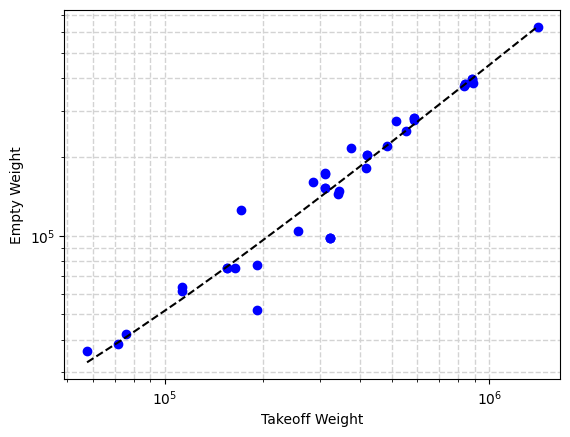

In [2]:
empty_weights_log = np.log10(empty_weights)
takeoff_weights_log = np.log10(takeoff_weights)

import matplotlib.pyplot as plt
fig1, ax1 = plt.subplots()

# coef = np.polyfit(takeoff_weights_log, empty_weights_log, 1)
coef = np.polyfit(takeoff_weights, empty_weights, 1)
B, A = np.polyfit(empty_weights_log, takeoff_weights_log, 1)
# m, b = np.polyfit()
print("A:", A, "B:", B)
poly1d_fn = np.poly1d(coef)

ax1.plot(takeoff_weights, empty_weights, 'bo', takeoff_weights, poly1d_fn(takeoff_weights), '--k')
ax1.set_xscale("log")
ax1.set_yscale("log")
ax1.grid(color='#D3D3D3', linestyle='--', linewidth=1, which="both")
# ax1.set_xticks([1000, 10000, 100000, 1000000])
# ax1.set_yticks([1000, 10000, 100000, 1000000])
ax1.set_xlabel("Takeoff Weight")
ax1.set_ylabel("Empty Weight")

In [3]:
climb_L_D = 14 #! need source for assumption
climb_TSFC = 0.36
climb_rate_fpm = 1500 # ft/min
cruise_alt_ft = 35000
cruise_alt_meters = cruise_alt_ft*0.3048

cruise_range_nm = 2500
cruise_velocity_mach = 0.8
cruise_velocity_kts = cruise_velocity_mach*666.739
cruise_L_D = 11.37 #! need source for assumption
cruise_TSFC = 0.65

In [4]:
segments = ["Start", "Taxi", "Takeoff", "Climb", "Cruise", "Descent", "Loiter", "Reserve Cruise", "Descent", "Land"]

Endurance_climb_hrs = 0.5
Endurance_loiter_hrs = 0.5

takeoff_weight_guess = 1500000

crew_weight = 300*4
payload_weight = 430000
Mff_tfo = 0.005

reserve_cruise_range_nm = 200
reserve_cruise_velocity_kts = 250

Mff_start = 0.99
Mff_taxi = 0.995
Mff_takeoff = 0.995
Mff_climb = np.e ** (-Endurance_climb_hrs*climb_TSFC/climb_L_D)
print("Mff_climb:", np.round(Mff_climb, 4))
Mff_cruise = (np.e ** (cruise_range_nm*cruise_TSFC/(cruise_velocity_kts*cruise_L_D))) ** -1
print("Mff_cruise", np.round(Mff_cruise, 4))
Mff_descent = 0.985
Mff_loiter = (np.e ** (Endurance_loiter_hrs*cruise_TSFC/(cruise_L_D))) ** -1
Mff_reserve_cruise = (np.e ** (reserve_cruise_range_nm*cruise_TSFC/(reserve_cruise_velocity_kts*cruise_L_D))) ** -1
Mff_final_descent = 0.985
Mff_land = 0.992
fuel_fraction = [Mff_start, Mff_taxi, Mff_takeoff, Mff_climb, Mff_cruise, Mff_descent, Mff_loiter, Mff_reserve_cruise, Mff_final_descent, Mff_land]
Mff = np.prod(fuel_fraction)
print("Marginal fuel fraction", np.round(Mff, 4))

Mff_res = (1 - Mff_loiter * Mff_reserve_cruise)

fuel_weight = (1 - Mff)*takeoff_weight_guess/(1 - Mff_res - Mff_tfo)
print("Fuel weight:", np.round(fuel_weight, 4))

Mff_climb: 0.9872
Mff_cruise 0.7649
Marginal fuel fraction 0.6614
Fuel weight: 550110.9656


In [5]:
# Weight Converging

empty_weight = takeoff_weight_guess - fuel_weight - payload_weight - crew_weight
print("Empty weight:", empty_weight)

log10_empty_weight = (np.log10(takeoff_weight_guess) - A)/B
empty_weight_allowable = 10 ** log10_empty_weight
print("Allowable empty weight:", empty_weight_allowable)
while abs(empty_weight - empty_weight_allowable) > 0.0001:
    if empty_weight > empty_weight_allowable:
        takeoff_weight_guess -= abs(empty_weight - empty_weight_allowable)/10
    else:
        takeoff_weight_guess += abs(empty_weight - empty_weight_allowable)/10
    empty_weight = takeoff_weight_guess - fuel_weight - payload_weight - crew_weight
    # print(empty_weight)
    log10_empty_weight = (np.log10(takeoff_weight_guess) - A)/B
    empty_weight_allowable = 10 ** log10_empty_weight

print("---------------------------")
print("We_calc:", empty_weight)
print("We_allow", empty_weight_allowable)
print("Difference:", empty_weight_allowable - empty_weight)
print("---------------------------")


Empty weight: 518689.0343673137
Allowable empty weight: 696670.1940602883
---------------------------
We_calc: 850285.5838107602
We_allow 850285.5839054887
Difference: 9.472854435443878e-05
---------------------------


In [6]:
# Fuel Fractions

start_weights = [takeoff_weight_guess]
fuel_used = []
table_data = []
for i in range(len(fuel_fraction)):
    start_weights.append(start_weights[i]*fuel_fraction[i])
    fuel_used.append(start_weights[i]*(1 - fuel_fraction[i]))
    
    if (segments[i] == "Cruise"):
        W_cruise = np.average([start_weights[i + 1], start_weights[i]])
    if (segments[i] == "Land"):
        W_landing = start_weights[i]
    
    table_data.append({
        "Segment": i + 1,
        "Phase": segments[i],
        "FF": np.round(fuel_fraction[i], decimals=4),
        "Weight": np.round(start_weights[i]*fuel_fraction[i], decimals=2),
        "Fuel Used": np.round(start_weights[i]*(1 - fuel_fraction[i]), decimals=3)
    })
    
print("{:<15} {:<15} {:<10} {:<10} {:<10}".format("Segment", "Phase", "FF", "Weight", "Fuel Used"))
print("=" * 60)
for row in table_data:
    print("{:<15} {:<15} {:<10} {:<10} {:<10}".format(row["Segment"], row["Phase"], row["FF"], row["Weight"], row["Fuel Used"]))

Segment         Phase           FF         Weight     Fuel Used 
1               Start           0.99       1813280.58 18315.965 
2               Taxi            0.995      1804214.18 9066.403  
3               Takeoff         0.995      1795193.11 9021.071  
4               Climb           0.9872     1772259.8  22933.31  
5               Cruise          0.7649     1355688.7  416571.096
6               Descent         0.985      1335353.37 20335.331 
7               Loiter          0.9718     1297724.0  37629.371 
8               Reserve Cruise  0.9553     1239710.12 58013.888 
9               Descent         0.985      1221114.46 18595.652 
10              Land            0.992      1211345.55 9768.916  


Swet            S               CD_0       K         
54505.1         30526.6         0.0036     0.047     


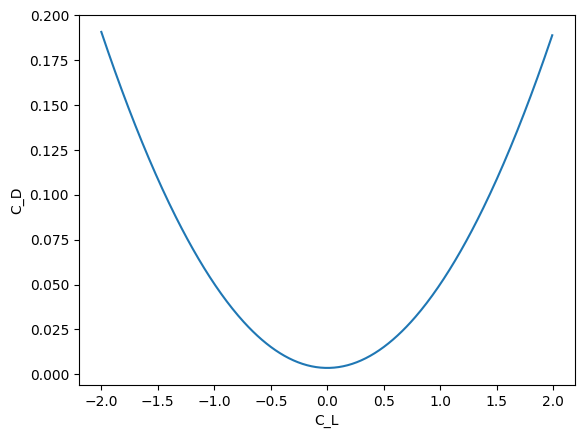

In [7]:
## - CLass I Drag Polar Estimation - ##
import numpy as np


takeoff_weight = empty_weight + fuel_weight + payload_weight + crew_weight

W_over_S = 60
c = 0.0199 # based on vehicle class, from Roskam
d = 0.7531 # based on vehicle class, from Roskam
cf = 0.002 # from Roskam
e = 0.85
AR = 8 # aspect ratio

S_wet = 10 ** (c + d*np.log10(takeoff_weight))

S = takeoff_weight/(W_over_S)


# Parasite Drag Estimation
C_D_0 = cf*S_wet/S

K = 1/(np.pi * AR * e)

Cl = np.arange(-2, 2, 0.01)

C_D = C_D_0 + K*(Cl ** 2)

fig1, ax1 = plt.subplots()
ax1.plot(Cl, C_D)
ax1.set_ylabel("C_D")
ax1.set_xlabel("C_L")

major_ticks_x = np.arange(-2, 2.2, 0.5)
minor_ticks_x = np.arange(-2, 2, 0.05)

major_ticks_y = np.arange(np.min(C_D), np.max(C_D), 0.25)
minor_ticks_y = np.arange(np.min(C_D), np.max(C_D), 0.0125)

# ax1.set_xticks(major_ticks_x)
# ax1.set_xticks(minor_ticks_x, minor=True)

# ax1.set_yticks(major_ticks_y)
# ax1.set_yticks(minor_ticks_y, minor=True)

# ax1.grid(which='minor', alpha=0.4)
# ax1.grid(which='major', alpha=0.8)

print("{:<15} {:<15} {:<10} {:<10}".format("Swet", "S", "CD_0", "K"))
print("=" * 47)
print("{:<15} {:<15} {:<10} {:<10}".format(np.round(S_wet, decimals=1), np.round(S, decimals=1), np.round(C_D_0, decimals=4), np.round(K, decimals=3)))

In [8]:
# Cruise L/D Estimation
M = 0.8
# cruise_velocity_kts = 533.391
# W_cruise = 26053.602 # Calculated based on average of climb and cruise weights
# air_density = 0.00029
# Calculating Air Density At Cruise
def calculateAirDensitySlugs(altitude, sea_level_temperature_ISA_C):
    alt_meters = altitude*0.3048
    
    # L1 = -0.0065 # Kelvin/meter
    # L2 = 0.001 # Kelvin/meter
    # L3 = 0.0028 # Kelvin/meter

    # if alt_meters >= 11000:
    #     air_temperature_at_height = (288.15 + sea_level_temperature_ISA_C) - L1*11000
    # else:
    #     air_temperature_at_height = (288.15 + sea_level_temperature_ISA_C) - L1*alt_meters
    
    # if alt_meters >= 20000:
    #     air_temperature_at_height = air_temperature_at_height + L2*(32000 - 20000)
    # else:
    #     air_temperature_at_height = air_temperature_at_height + L2*(alt_meters - 20000)
        
    # if alt_meters >= 32000:
    #     air_temperature_at_height = air_temperature_at_height + L3*(alt_meters - 32000)
    
    # print(air_temperature_at_height)
    
    air_temperature_at_height = -131.21 + 0.00299*alt_meters
    # air_temperature_at_height = -131.21 + sea_level_temperature_ISA_C + 0.00299*alt_meters
    air_pressure_at_height = 2.488*(((air_temperature_at_height + 273.1)/216.6) ** -11.388)
    air_density = air_pressure_at_height/(0.2869 * (air_temperature_at_height + 273.1))
    return air_density*0.00194032 # conversion to slugs

air_density_cruise_slugs = calculateAirDensitySlugs(altitude=cruise_alt_ft, sea_level_temperature_ISA_C=15)
print("Density (slug/ft3):", air_density_cruise_slugs)
# air_density_cruise_slugs = 0.00029 #! How is this calculated?

# Converting Cruise Velocity to ft/s
cruise_velocity_fts = cruise_velocity_kts*1.68781
print("Cruise Velocity (ft/s):", np.round(cruise_velocity_fts, decimals=1))
print("Cruise Weight (lbs):", np.round(W_cruise, decimals=1))

# Calculating Cruise CL
CL_cruise = W_cruise/(air_density_cruise_slugs*(cruise_velocity_fts ** 2)*(S/2))
print("Cruise C_L:", CL_cruise)

# Calculating Cruise CD
C_D_wave = 0.00465
CD_cruise = C_D_0 + K*(CL_cruise ** 2) + C_D_wave
print("Cruise C_D:", CD_cruise)

# Calculating Cruise L/D
L_D_cruise = CL_cruise / CD_cruise
print("Cruise L/D:", L_D_cruise)

Density (slug/ft3): 0.0011888514557408419
Cruise Velocity (ft/s): 900.3
Cruise Weight (lbs): 1563974.3
Cruise C_L: 0.1063444012337339
Cruise C_D: 0.008750373017361323
Cruise L/D: 12.153127760695403


In [9]:
# General Constraint Sizing Assumptions
air_density_SL_slugs = 0.00225955
air_density_cruise_slugs = 0.000689369
air_density_takeoff_slugs = air_density_SL_slugs
air_density_ceiling_slugs = 0.000473807

start_range = 1
end_range = 250

wing_loads = range(start_range, end_range, 1)

g0 = 32.17405

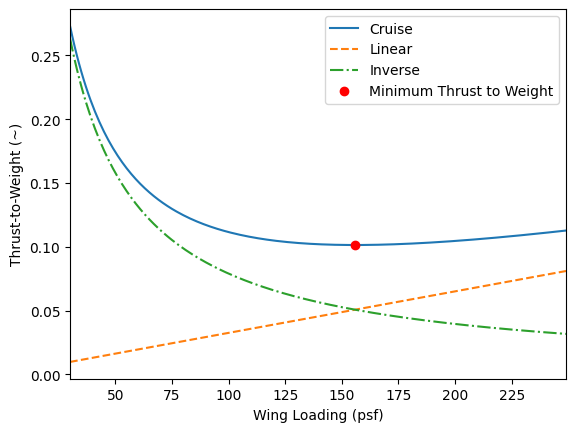

In [10]:
# Constraint Sizing - Cruise/Max
#! Key Assumptions (All Constraint Sizing):
#* Aircraft is a point mass, what are the implications of this? What is being ignored?
#* Thrust and Drag Act in Same Direction as Velocity - Is this true? Why can this assumption be made?
# Thrust Lapse - alpha - Thrust = alpha * Sea Level Thrust
# Weight Payload/Fuel Correction - beta - Weight = beta * Takeoff Weight - beta = Weight / Takeoff Weight

Ps = 0
dhdt = 0
dVdt = 0
n = 1
R = 0
h = cruise_alt_ft
V = cruise_velocity_fts
K1 = K
# Assumption K2 is 0 due to absence of data
K2 = 0
M = cruise_velocity_mach

sigma = air_density_cruise_slugs/air_density_SL_slugs

# Assumption - High Bypass Ratio Turbofan Engine (M < 0.9)
alpha = 0.76 * (0.568 + 0.25 * ((1.2 - M) ** 3)) * (sigma ** 0.6)

beta = W_cruise/takeoff_weight

L = n*W_cruise
q = L/(CL_cruise*S)

wing_load = takeoff_weight/S

# thrustToWeight = (beta / alpha)*(K1*(beta/q)*(wing_load) + K2 + C_D_0/((beta/q)*(wing_load)))

thrustToWeightList = []
linearTermList = []
inverseTermList = []
wing_loads = range(30, 250, 1)
for wing_load in wing_loads:
    thrustToWeightList.append((beta / alpha)*(K1*(beta/q)*(wing_load) + K2 + C_D_0/((beta/q)*(wing_load))))
    linearTermList.append((beta / alpha)*(K1*(beta/q)*(wing_load)))
    inverseTermList.append((beta / alpha) * (C_D_0/((beta/q)*(wing_load))))
    
cruiseThrustToWeight = thrustToWeightList
    
minThrustToWeightIndex = thrustToWeightList.index(min(thrustToWeightList))

plt.plot(wing_loads, thrustToWeightList, '-', wing_loads, linearTermList, '--', wing_loads, inverseTermList, '-.', wing_loads[minThrustToWeightIndex], thrustToWeightList[minThrustToWeightIndex], 'ro')
plt.xlim(min(wing_loads), max(wing_loads))
plt.legend(["Cruise", "Linear", "Inverse", "Minimum Thrust to Weight"])
plt.ylabel('Thrust-to-Weight (~)')
plt.xlabel('Wing Loading (psf)')
# plt.title("Cruise/Max")
plt.show()

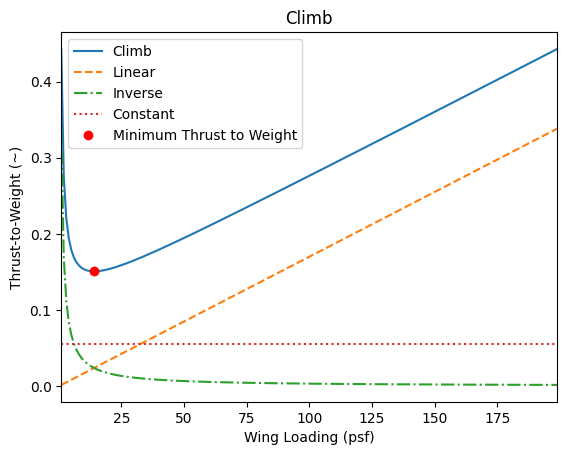

In [11]:
# Constraint Sizing - Climb
def calcClimbThrustToWeights(takeoff_weight, L, S, CLmax_takeoff, climb_rate_fpm, start_range, end_range):
    K2 = 0 # Assumed
    dVdt = 0
    n = 1
    R = 0
    h = 0
    dhdt = climb_rate_fpm / 60 # fpm to ft/s
    Ps = dhdt

    # Ps = (dhdt + ((V ** 2)/(g0))*dVdt)
    M = 0.4
    V = M * 1125.33
    
    # V = dhdt / np.arcsin(np.deg2rad(10))

    sigma = air_density_takeoff_slugs/air_density_SL_slugs

    alpha = 0.76 * (0.568 + 0.25 * ((1.2 - M) ** 3)) * (sigma ** 0.6)

    beta = 0.98 # assumption of some fuel burned during takeoff
    L = n*takeoff_weight
    q = L/(CLmax_takeoff*S)

    thrustToWeightList = []
    linearTermList = []
    inverseTermList = []
    constantTermList = []
    wing_loads = range(start_range, end_range, 1)
    for wing_load in wing_loads:
        thrustToWeightList.append((beta/alpha) * (K1 * (beta/q) * (wing_load) + K2 + C_D_0/((beta/q) * (wing_load)) + (1/V) * dhdt))
        linearTermList.append((beta / alpha)*(K1*(beta/q)*(wing_load)))
        inverseTermList.append((beta/alpha) * (C_D_0/((beta/q) * (wing_load))))
        constantTermList.append((1/V) * dhdt)
    
    return thrustToWeightList, linearTermList, inverseTermList, constantTermList
    
CLmax_takeoff = 1.2 #? Need a better assumption?

thrustToWeightList, linearTermList, inverseTermList, constantTermList = calcClimbThrustToWeights(takeoff_weight, L, S, CLmax_takeoff=1.2, climb_rate_fpm=climb_rate_fpm, start_range=1, end_range=200)

climbThrustToWeight, _, _, _ = calcClimbThrustToWeights(takeoff_weight, L, S, CLmax_takeoff=1.2, climb_rate_fpm=climb_rate_fpm, start_range=30, end_range=250)
    
minThrustToWeightIndex = thrustToWeightList.index(min(thrustToWeightList))
wing_loads = range(1, 200, 1)
plt.plot(wing_loads, thrustToWeightList, '-')
plt.plot(wing_loads, linearTermList, '--')
plt.plot(wing_loads, inverseTermList, '-.')
plt.plot(wing_loads, constantTermList, ':')
plt.plot(wing_loads[minThrustToWeightIndex], thrustToWeightList[minThrustToWeightIndex], 'ro')
plt.xlim(min(wing_loads), max(wing_loads))
plt.legend(["Climb", "Linear", "Inverse", "Constant", "Minimum Thrust to Weight"])
plt.ylabel('Thrust-to-Weight (~)')
plt.xlabel('Wing Loading (psf)')
plt.title("Climb") #! Remove in report
plt.show()

In [12]:
# Constraint Sizing - Service Ceiling #? Is a plot required?

dVdt = 0
n = 1
R = 0
dhdt = 100/60 # ft/s
h = 43000

sigma = air_density_ceiling_slugs/air_density_SL_slugs

#? Service ceiling question - is V or Cl known? Do we assume one?
# Assuming Cl = 1.95, which gives reasonable M

beta = W_cruise/takeoff_weight

CL_max = 2.5
V = np.sqrt(((2 * beta)/(sigma * air_density_SL_slugs * CL_max))*(takeoff_weight/S))
M = V*0.00291545
print("Service Ceiling Mach:", M)

alpha = 0.76 * (0.568 + 0.25 * ((1.2 - M) ** 3)) * (sigma ** 0.6)
SC_ThrustToWeight = (beta/alpha)*(K1*CL_max + C_D_0/CL_max + (1/V)*dhdt)
print("Service Ceiling Thrust To Weight:", SC_ThrustToWeight)

Service Ceiling Mach: 0.8574827085949467
Service Ceiling Thrust To Weight: 0.6159148135565752


0.1063444012337339


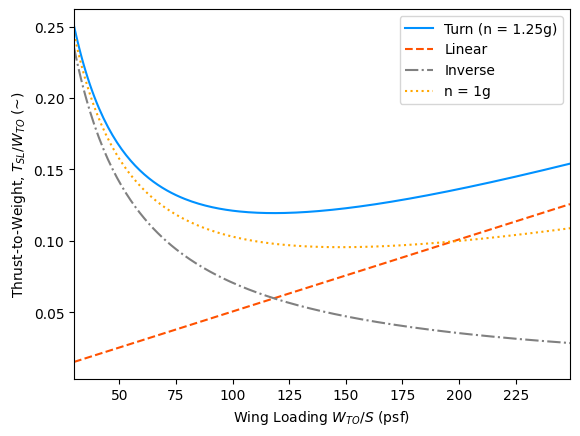

In [13]:
# Constraint Sizing - Constant Altitude/Speed Turn
def calcThrustToWeights(cruise_alt_ft, W_cruise, takeoff_weight, air_density_cruise_slugs, air_density_SL_slugs, L, CL_cruise, S, K1, K2, n, M):    
    dhdt = 0
    dVdt = 0
    R = 0
    h = cruise_alt_ft
    # Rc = # turn radius

    # n = (1 + (((V ** 2)/(g0*Rc)) ** 2)) ** 0.5

    beta = 0.9
    sigma = air_density_cruise_slugs/air_density_SL_slugs

    # M = 0.5 # Assumption for Maneuvering Speed #! Needs citation
    # Assumption - High Bypass Ratio Turbofan Engine (M < 0.9)
    alpha = 0.76 * (0.568 + 0.25 * ((1.2 - M) ** 3)) * (sigma ** 0.6)

    q = L/(CL_cruise*S)

    thrustToWeightList = []
    linearTermList = []
    inverseTermList = []
    constantTermList = []
    # wing_loads = range(30, 200, 5)
    for wing_load in wing_loads:
        # thrustToWeight = (beta/alpha)*((K1 * (n ** 2) * (beta/q) * (takeoff_weight/S)) + K2*n + C_D_0/((beta/q)*(wing_load)))
        thrustToWeightList.append((beta/alpha)*((K1 * (n ** 2) * (beta/q) * (wing_load)) + K2*n + C_D_0/((beta/q)*(wing_load))))
        linearTermList.append((beta / alpha)*(K1 * (n ** 2) * (beta/q) * (wing_load)))
        inverseTermList.append((beta/alpha) * C_D_0/((beta/q)*(wing_load)))
        constantTermList.append((beta/alpha)*((K1 * (1 ** 2) * (beta/q) * (wing_load)) + K2*1 + C_D_0/((beta/q)*(wing_load))))
        
    return thrustToWeightList, linearTermList, inverseTermList, constantTermList

air_density_cruise_slugs = 0.000689369

wing_loads = range(30, 250, 1)
TurnThrustToWeightList, linearTermList, inverseTermList, constantTermList = calcThrustToWeights(cruise_alt_ft, W_cruise, takeoff_weight, air_density_cruise_slugs, air_density_SL_slugs, L, CL_cruise, S, K1, K2, n=1.25, M=0.5)
    
minThrustToWeightIndex = TurnThrustToWeightList.index(min(TurnThrustToWeightList))

print(CL_cruise)

plt.plot(wing_loads, TurnThrustToWeightList, '-', color='#0091ff')
plt.plot(wing_loads, linearTermList, '--', color='#ff5100')
plt.plot(wing_loads, inverseTermList, '-.', color='grey')
plt.plot(wing_loads, constantTermList, ':', color='#ffa600')
plt.xlim(min(wing_loads), max(wing_loads))
plt.ylabel(r'Thrust-to-Weight, $T_{SL} / W_{TO}$ (~)')
plt.xlabel(r'Wing Loading $W_{TO} / S$ (psf)')
plt.legend(["Turn (n = 1.25g)", "Linear", "Inverse", "n = 1g"])
# plt.title("Constant Altitude/Speed Turn") #! Remove in report
plt.show()

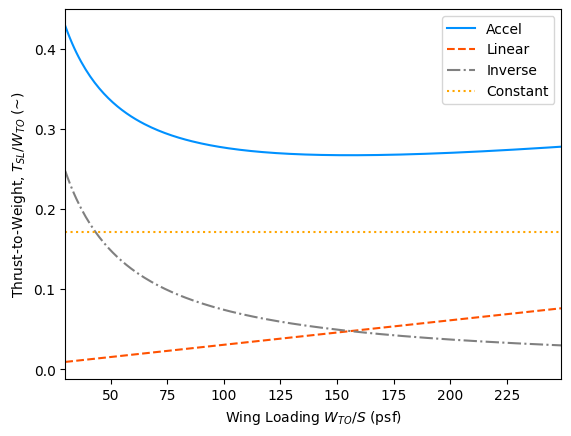

In [14]:
# Constraint Sizing - Horizontal Acceleration
def calcAccelThrustToWeights(cruise_alt_ft, g0, air_density_cruise_slugs, air_density_SL_slugs, W_cruise, takeoff_weight, L, CL_cruise, S, M_start, M_cruise, accel_time_min):    
    n = 1
    R = 0

    # Will Assume Scenario of Accelerating to Cruise Mach
    h = cruise_alt_ft
    
    accel_time_s = accel_time_min*60

    dVdt = ((M_cruise - M_start) * 1125.33)/accel_time_s # Accelerate to Mach 0.8 from 0.4 in 5 minutes
    V = M_start * 1125.33 # Mach to ft/s

    Ps = V*dVdt/g0

    sigma = air_density_cruise_slugs/air_density_SL_slugs
    alpha = 0.76 * (0.568 + 0.25 * ((1.2 - ((M_start + M_cruise)/2)) ** 3)) * (sigma ** 0.6)
    beta = W_cruise/takeoff_weight

    q = L/(CL_cruise*S)

    thrustToWeightList = []
    linearTermList = []
    inverseTermList = []
    constantTermList = []
    # wing_loads = range(30, 300, 1)
    for wing_load in wing_loads:
        # thrustToWeight = (beta/alpha)*((K1 * wing_load * (beta/q)) + K2 + C_D_0/((beta/q)*(wing_load)) + (1/g0)*dVdt)
        thrustToWeightList.append((beta/alpha)*((K1 * wing_load * (beta/q)) + K2 + C_D_0/((beta/q)*(wing_load)) + (1/g0)*dVdt))
        linearTermList.append((beta / alpha)*(K1 * (beta/q) * wing_load))
        inverseTermList.append((beta/alpha) * C_D_0/((beta/q)*(wing_load)))
        constantTermList.append((beta/alpha)*((1/g0)*dVdt))
        
    return thrustToWeightList, linearTermList, inverseTermList, constantTermList

thrustToWeightList, linearTermList, inverseTermList, constantTermList = calcAccelThrustToWeights(cruise_alt_ft, g0, air_density_cruise_slugs, air_density_SL_slugs, W_cruise, takeoff_weight, L, CL_cruise, S, M_start=0.4, M_cruise=0.8, accel_time_min=5)

accelerationThrustToWeight = thrustToWeightList
    
minThrustToWeightIndex = thrustToWeightList.index(min(thrustToWeightList))

plt.plot(wing_loads, thrustToWeightList, '-', color='#0091ff')
plt.plot(wing_loads, linearTermList, '--', color='#ff5100')
plt.plot(wing_loads, inverseTermList, '-.', color='grey')
plt.plot(wing_loads, constantTermList, ':', color='#ffa600')
plt.xlim(min(wing_loads), max(wing_loads))
plt.legend(["Accel", "Linear", "Inverse", "Constant"])
plt.ylabel(r'Thrust-to-Weight, $T_{SL} / W_{TO}$ (~)')
plt.xlabel(r'Wing Loading $W_{TO} / S$ (psf)')
# plt.title("Horizontal Acceleration") #! Remove in report
plt.show()






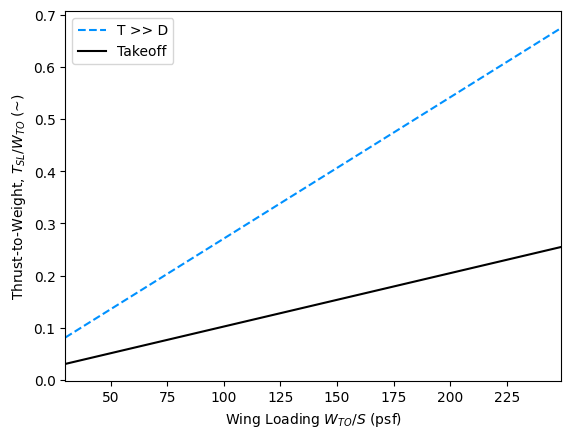

Power To Weight: 0.0904490164749985
Takeoff Thrust to Weight: 0.20833333333333334


In [15]:
# Constraint Sizing - Takeoff Ground Roll (Max Thrust)

dhdt = 0

sigma = air_density_takeoff_slugs/air_density_SL_slugs
beta = takeoff_weight/takeoff_weight
M = 0.2
alpha = 0.76 * (0.568 + 0.25 * ((1.2 - M) ** 3)) * (sigma ** 0.6)

k_TO = 1.15 # Military so we care less

s_G = 9000

ThrustToWeight = ((beta ** 2)/alpha)*((k_TO ** 2)/(s_G * air_density_takeoff_slugs * g0 * CLmax_takeoff))*(wing_load)

# Constraint Sizing - Takeoff Ground Roll (Low Thrust)
S_TO = 9000 # Takeoff Length Requirement

sigma = air_density_takeoff_slugs/air_density_takeoff_slugs

thrustToWeightList = []
maxThrustToWeightList = []
# wing_loads = range(20, 150, 1)
for wing_load in wing_loads:
    thrustToWeightList.append(37.5*wing_load/(sigma * CLmax_takeoff * S))
    maxThrustToWeightList.append(((beta ** 2)/alpha)*((k_TO ** 2)/(s_G * air_density_takeoff_slugs * g0 * CLmax_takeoff))*(wing_load))
    
TOP25ThrustToWeightList = thrustToWeightList
TakeoffThrustToWeightList = maxThrustToWeightList
    
minThrustToWeightIndex = thrustToWeightList.index(min(thrustToWeightList))

plt.plot(wing_loads, maxThrustToWeightList, '--', color='#0091ff')
plt.plot(wing_loads, thrustToWeightList, '-', color='black')
plt.legend(["T >> D", "Takeoff"])
plt.xlim(min(wing_loads), max(wing_loads))
plt.ylabel(r'Thrust-to-Weight, $T_{SL} / W_{TO}$ (~)')
plt.xlabel(r'Wing Loading $W_{TO} / S$ (psf)')
# plt.title("Takeoff Ground Roll") #! Remove in report
plt.show()

TOP_23 = (-8.134 + np.sqrt((8.314 ** 2) - (4 * 0.0149 * -S_TO)))/(2 * 0.0149)
PowerToWeight = (takeoff_weight/S)/(TOP_23 * CLmax_takeoff * sigma)
print("Power To Weight:", PowerToWeight)

ThrustToWeight = 37.5*(takeoff_weight/S)/(sigma * CLmax_takeoff * S_TO)
print("Takeoff Thrust to Weight:", ThrustToWeight)

In [16]:
# Constraint Sizing - Braking Roll/Approach Speed

sigma = air_density_takeoff_slugs/air_density_SL_slugs
beta = W_landing/takeoff_weight

k_app = 1.3
V_app = k_app * np.sqrt((2*beta/(air_density_SL_slugs*CL_max)) * takeoff_weight/S) # ft/s
V_app_kts = V_app * 0.592484 # ft -> kts
print(f"Approach Speed: {np.round(V_app_kts, 1)} kts")

S_Land = 0.3 * (V_app_kts ** 2) # For distance in ft and speed in kts
print(f"Landing Distance: {np.round(S_Land)} ft")

wing_load_approach = air_density_takeoff_slugs*(V_app ** 2)*CL_max/(2 * (k_app ** 2) * beta)

print("Approach Wing Load:", wing_load_approach)


M = 0
alpha = 0.76 * (0.568 + 0.25 * ((1.2 - M) ** 3)) * (sigma ** 0.6)

Approach Speed: 91.7 kts
Landing Distance: 2521.0 ft
Approach Wing Load: 60.000000000000014


# Stuff to Ask About:
- CLmax_takeoff assumption
- air density at altitude calculation
- Any plot needed for service ceiling?
- Cl assumption in service ceiling? Is this C_Lmax?
- Do we assume a mach number for maneuvering speed
- Is Mach 0.4 to 0.8 in 5 minutes a reasonable assumption? Can we just look at other aircraft accelerations and cite those?
- s_G in takeoff ground roll (high thrust) calculations, how do we get this? Is it assumed based on requirement?
- Low thrust takeoff - use TOP23 or 25? Thrust/Weight seems very high.
- C_Lmax assumption?



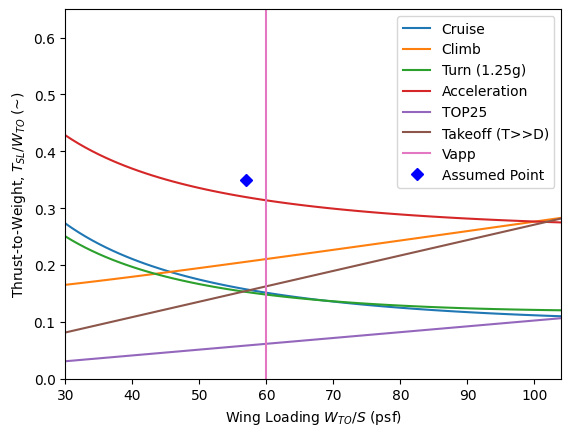

In [17]:
# Combined Constraint Plot
start_range = 0
end_range = 75

min_wingload = 0
max_wingload = 0.65

plt.plot(wing_loads[start_range:end_range], cruiseThrustToWeight[start_range:end_range])
plt.plot(wing_loads[start_range:end_range], climbThrustToWeight[start_range:end_range])
plt.plot(wing_loads[start_range:end_range], TurnThrustToWeightList[start_range:end_range])
plt.plot(wing_loads[start_range:end_range], accelerationThrustToWeight[start_range:end_range])
plt.plot(wing_loads[start_range:end_range], TOP25ThrustToWeightList[start_range:end_range])
plt.plot(wing_loads[start_range:end_range], TakeoffThrustToWeightList[start_range:end_range])
plt.plot([wing_load_approach, wing_load_approach], [min_wingload, max_wingload])
# plt.plot([wing_loads[start_range], wing_loads[end_range]], [SC_ThrustToWeight, SC_ThrustToWeight])
plt.plot(57, 0.35, 'bD')
plt.legend(["Cruise", "Climb", "Turn (1.25g)", "Acceleration", "TOP25", "Takeoff (T>>D)", "Vapp", "Assumed Point"])
plt.xlim(wing_loads[start_range], wing_loads[end_range - 1])
plt.ylim(min_wingload, max_wingload)
plt.ylabel(r'Thrust-to-Weight, $T_{SL} / W_{TO}$ (~)')
plt.xlabel(r'Wing Loading $W_{TO} / S$ (psf)')
plt.show()

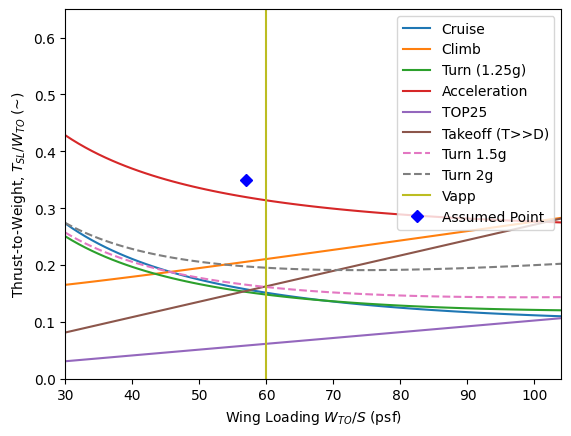

In [18]:
# Trade Study - 1.5 and 2g turns

TurnThrustToWeightList_1_5G, _, _, _ = calcThrustToWeights(cruise_alt_ft, W_cruise, takeoff_weight, air_density_cruise_slugs, air_density_SL_slugs, L, CL_cruise, S, K1, K2, n=1.5, M=0.5)
TurnThrustToWeightList_2G, _, _, _ = calcThrustToWeights(cruise_alt_ft, W_cruise, takeoff_weight, air_density_cruise_slugs, air_density_SL_slugs, L, CL_cruise, S, K1, K2, n=2, M=0.5)

min_wingload = 0
max_wingload = 0.65

start_range = 0
end_range = 75

plt.plot(wing_loads[start_range:end_range], cruiseThrustToWeight[start_range:end_range])
plt.plot(wing_loads[start_range:end_range], climbThrustToWeight[start_range:end_range])
plt.plot(wing_loads[start_range:end_range], TurnThrustToWeightList[start_range:end_range])
plt.plot(wing_loads[start_range:end_range], accelerationThrustToWeight[start_range:end_range])
plt.plot(wing_loads[start_range:end_range], TOP25ThrustToWeightList[start_range:end_range])
plt.plot(wing_loads[start_range:end_range], TakeoffThrustToWeightList[start_range:end_range])
plt.plot(wing_loads[start_range:end_range], TurnThrustToWeightList_1_5G[start_range:end_range], '--')
plt.plot(wing_loads[start_range:end_range], TurnThrustToWeightList_2G[start_range:end_range], '--')
plt.plot([wing_load_approach, wing_load_approach], [min_wingload, max_wingload])
plt.plot(57, 0.35, 'bD')
plt.legend(["Cruise", "Climb", "Turn (1.25g)", "Acceleration", "TOP25", "Takeoff (T>>D)", "Turn 1.5g", "Turn 2g", "Vapp", "Assumed Point"], loc='upper right')
plt.xlim(wing_loads[start_range], wing_loads[end_range - 1])
plt.ylim(min_wingload, max_wingload)
plt.ylabel(r'Thrust-to-Weight, $T_{SL} / W_{TO}$ (~)')
plt.xlabel(r'Wing Loading $W_{TO} / S$ (psf)')
plt.show()

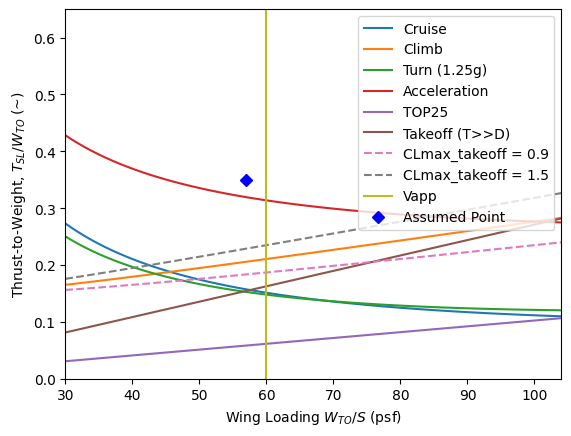

In [19]:
# Trade Study - CLmax_takeoff = 0.9 and 1.5
climbThrustToWeight_CL_0_9, _, _, _ = calcClimbThrustToWeights(takeoff_weight, L, S, CLmax_takeoff=0.9, climb_rate_fpm=climb_rate_fpm, start_range=30, end_range=250)
climbThrustToWeight_CL_1_5, _, _, _ = calcClimbThrustToWeights(takeoff_weight, L, S, CLmax_takeoff=1.5, climb_rate_fpm=climb_rate_fpm, start_range=30, end_range=250)

min_wingload = 0
max_wingload = 0.65

start_range = 0
end_range = 75

plt.plot(wing_loads[start_range:end_range], cruiseThrustToWeight[start_range:end_range])
plt.plot(wing_loads[start_range:end_range], climbThrustToWeight[start_range:end_range])
plt.plot(wing_loads[start_range:end_range], TurnThrustToWeightList[start_range:end_range])
plt.plot(wing_loads[start_range:end_range], accelerationThrustToWeight[start_range:end_range])
plt.plot(wing_loads[start_range:end_range], TOP25ThrustToWeightList[start_range:end_range])
plt.plot(wing_loads[start_range:end_range], TakeoffThrustToWeightList[start_range:end_range])
plt.plot(wing_loads[start_range:end_range], climbThrustToWeight_CL_0_9[start_range:end_range], '--')
plt.plot(wing_loads[start_range:end_range], climbThrustToWeight_CL_1_5[start_range:end_range], '--')
plt.plot([wing_load_approach, wing_load_approach], [min_wingload, max_wingload])
plt.plot(57, 0.35, 'bD')
plt.legend(["Cruise", "Climb", "Turn (1.25g)", "Acceleration", "TOP25", "Takeoff (T>>D)", "CLmax_takeoff = 0.9", "CLmax_takeoff = 1.5", "Vapp", "Assumed Point"], loc='upper right')
plt.xlim(wing_loads[start_range], wing_loads[end_range - 1])
plt.ylim(min_wingload, max_wingload)
plt.ylabel(r'Thrust-to-Weight, $T_{SL} / W_{TO}$ (~)')
plt.xlabel(r'Wing Loading $W_{TO} / S$ (psf)')
plt.show()

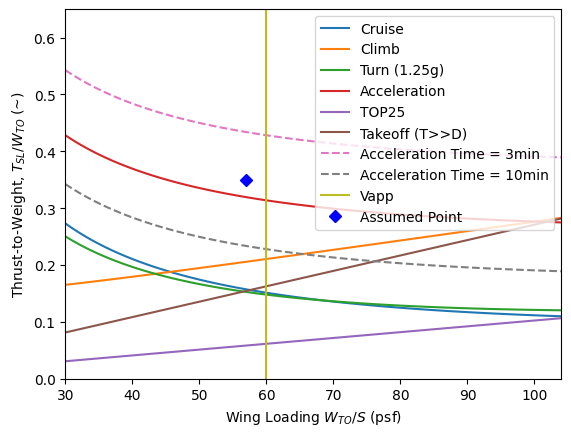

In [20]:
# Trade Study - Acceleration to Cruise Conditions in 2 minutes, 10 minutes

accelThrustToWeight_t_3min, _, _, _ = calcAccelThrustToWeights(cruise_alt_ft, g0, air_density_cruise_slugs, air_density_SL_slugs, W_cruise, takeoff_weight, L, CL_cruise, S, M_start=0.4, M_cruise=0.8, accel_time_min=3)
accelThrustToWeight_t_10min, _, _, _ = calcAccelThrustToWeights(cruise_alt_ft, g0, air_density_cruise_slugs, air_density_SL_slugs, W_cruise, takeoff_weight, L, CL_cruise, S, M_start=0.4, M_cruise=0.8, accel_time_min=10)


min_wingload = 0
max_wingload = 0.65

start_range = 0
end_range = 75

plt.plot(wing_loads[start_range:end_range], cruiseThrustToWeight[start_range:end_range])
plt.plot(wing_loads[start_range:end_range], climbThrustToWeight[start_range:end_range])
plt.plot(wing_loads[start_range:end_range], TurnThrustToWeightList[start_range:end_range])
plt.plot(wing_loads[start_range:end_range], accelerationThrustToWeight[start_range:end_range])
plt.plot(wing_loads[start_range:end_range], TOP25ThrustToWeightList[start_range:end_range])
plt.plot(wing_loads[start_range:end_range], TakeoffThrustToWeightList[start_range:end_range])
plt.plot(wing_loads[start_range:end_range], accelThrustToWeight_t_3min[start_range:end_range], '--')
plt.plot(wing_loads[start_range:end_range], accelThrustToWeight_t_10min[start_range:end_range], '--')
plt.plot([wing_load_approach, wing_load_approach], [min_wingload, max_wingload])
plt.plot(57, 0.35, 'bD')
plt.legend(["Cruise", "Climb", "Turn (1.25g)", "Acceleration", "TOP25", "Takeoff (T>>D)", "Acceleration Time = 3min", "Acceleration Time = 10min", "Vapp", "Assumed Point"], loc='upper right')
plt.xlim(wing_loads[start_range], wing_loads[end_range - 1])
plt.ylim(min_wingload, max_wingload)
plt.ylabel(r'Thrust-to-Weight, $T_{SL} / W_{TO}$ (~)')
plt.xlabel(r'Wing Loading $W_{TO} / S$ (psf)')
plt.show()


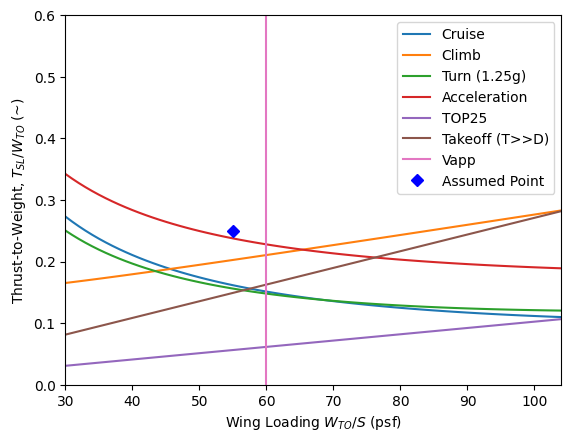

Selected Wing Loading: 55 psf
Selected Thrust to Weight: 0.25
Required Thrust: 457899.0 lbs


In [27]:
climbThrustToWeight_CL_0_9, _, _, _ = calcClimbThrustToWeights(takeoff_weight, L, S, CLmax_takeoff=1.2, climb_rate_fpm=climb_rate_fpm, start_range=30, end_range=250)
accelThrustToWeight_t_10min, _, _, _ = calcAccelThrustToWeights(cruise_alt_ft, g0, air_density_cruise_slugs, air_density_SL_slugs, W_cruise, takeoff_weight, L, CL_cruise, S, M_start=0.4, M_cruise=0.8, accel_time_min=10)

min_wingload = 0
max_wingload = 0.6

start_range = 0
end_range = 75

wing_loading_selection = 55
thrust_to_weight_selection = 0.25

plt.plot(wing_loads[start_range:end_range], cruiseThrustToWeight[start_range:end_range])
plt.plot(wing_loads[start_range:end_range], climbThrustToWeight_CL_0_9[start_range:end_range])
plt.plot(wing_loads[start_range:end_range], TurnThrustToWeightList[start_range:end_range])
plt.plot(wing_loads[start_range:end_range], accelThrustToWeight_t_10min[start_range:end_range])
plt.plot(wing_loads[start_range:end_range], TOP25ThrustToWeightList[start_range:end_range])
plt.plot(wing_loads[start_range:end_range], TakeoffThrustToWeightList[start_range:end_range])
plt.plot([wing_load_approach, wing_load_approach], [min_wingload, max_wingload])
plt.plot(wing_loading_selection, thrust_to_weight_selection, 'bD')
plt.legend(["Cruise", "Climb", "Turn (1.25g)", "Acceleration", "TOP25", "Takeoff (T>>D)", "Vapp", "Assumed Point"])
plt.xlim(wing_loads[start_range], wing_loads[end_range - 1])
plt.ylim(min_wingload, max_wingload)
plt.ylabel(r'Thrust-to-Weight, $T_{SL} / W_{TO}$ (~)')
plt.xlabel(r'Wing Loading $W_{TO} / S$ (psf)')
plt.show()

print(f"Selected Wing Loading: {wing_loading_selection} psf")
print(f"Selected Thrust to Weight: {thrust_to_weight_selection}")
print(f"Required Thrust: {np.round(thrust_to_weight_selection*takeoff_weight)} lbs")